In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../input/covid19-tweets/covid19_tweets.csv')

In [3]:
data.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [4]:
data.head(3)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False


# Sentiment analysis of tweets
- lets see if we can find any interesting changes in sentiment or popularity of topics in twitter in this dataset of #covid19 tweets since the start of the collected data on the 25th of July 2020
- shout out to this article https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/
- and this kernel https://www.kaggle.com/raenish/covid19-peoples-voice-sentiment-location/#2.-Data

In [5]:
!pip install textblob

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [6]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /usr/share/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /usr/share/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [7]:
import re
from textblob import TextBlob

In [8]:
# for tweet cleaning
# def clean_tweet(self, tweet):
def clean_tweet(tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 

In [9]:
# assigning sentiment
#def get_tweet_sentiment(self, tweet): 
def get_tweet_sentiment(tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
#         analysis = TextBlob(self.clean_tweet(tweet))
        analysis = TextBlob(clean_tweet(tweet)) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'

In [10]:
# # for counting positive and negative tweets
# ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
# ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']

- maybe we can calculate the postive, neutral and negative sentiment counts per day over the course of the last few weeks to start with

In [11]:
sentiment_list = []
current_tweet = ''
for i, j in enumerate(data['text']):
    current_tweet = clean_tweet(j)
    sentiment_list.append(get_tweet_sentiment(current_tweet))
    current_tweet = ''
    
data['sentiment'] = sentiment_list

In [12]:
data.head(3)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,negative
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,positive
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,neutral


In [13]:
data['datetime'] = pd.to_datetime(data['date'])

In [14]:
data.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet', 'sentiment',
       'datetime'],
      dtype='object')

In [15]:
daily_data = data.groupby(by=data['datetime'].dt.date)

In [16]:
# daily_data.values_counts()

In [17]:
for i in daily_data:
    print(i[0])

2020-07-24
2020-07-25
2020-07-26
2020-07-27
2020-07-28
2020-07-29
2020-07-30
2020-07-31
2020-08-01
2020-08-02
2020-08-04
2020-08-06
2020-08-07
2020-08-08
2020-08-09
2020-08-10
2020-08-11
2020-08-12
2020-08-13
2020-08-14
2020-08-16
2020-08-17
2020-08-18


In [18]:
sent_count = {}
for i, j in enumerate(daily_data):
    #sent_count.append(i[1]['sentiment'].value_counts())
    sent_count[i] = j[1]['sentiment'].value_counts()

In [19]:
day_list = []
for i in daily_data:
    day_list.append(i[0])

In [20]:
daily_df = pd.DataFrame()
daily_df['day'] = day_list

In [21]:
daily_df['positive'] = [sent_count[x][0] for x in sent_count]
daily_df['neutral'] = [sent_count[x][1] for x in sent_count]
daily_df['negative'] = [sent_count[x][2] for x in sent_count]

In [22]:
daily_df.head()

,day,positive,neutral,negative
0,2020-07-24,115,113,67
1,2020-07-25,7324,6760,2797
2,2020-07-26,3319,2854,1327
3,2020-07-27,3188,2878,1434
4,2020-07-28,3106,3097,1297


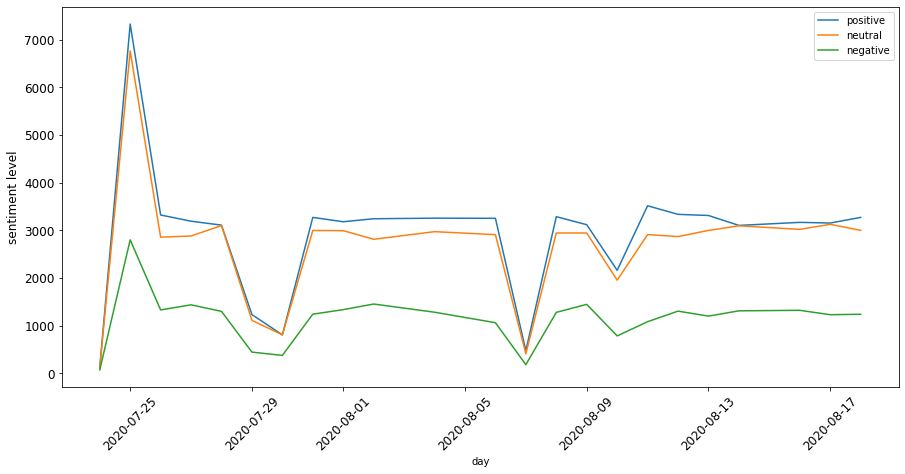

In [23]:
ax = daily_df.plot(x = 'day', figsize = (15, 7), rot = 45, fontsize = 12);
ax.set_ylabel('sentiment level', fontsize = 12);

- The plot above shows the overall sentiment of the #covid19 twittersphere as time progresses

- We can see that negativity is overall less common than neutrality or positivity and that the three sentiments track fairly well we each other in their overall trajectories if not their levels

- Some days there is far more twitter activity than others, presumably correlating with some sort of significant event in the news

# Which countries are tweeting the most?

In [24]:
country_counts = data['user_location'].value_counts()

In [31]:
country_code=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [34]:
data['country_name']=data['user_location'].str.split(',').str[-1]
data['only_date']=pd.to_datetime(data['date']).dt.date

#Keeping countries with valid country name
with_country_name=data[data['country_name'].isin(list(country_code['COUNTRY']))]
with_country_name['filtered_name']=data['country_name']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
import json
import requests

state = json.loads(requests.get("https://raw.githubusercontent.com/praneshsaminathan/country-state-city/master/states.json").text)
country=json.loads(requests.get("https://raw.githubusercontent.com/praneshsaminathan/country-state-city/master/countries.json").text)
city=json.loads(requests.get("https://raw.githubusercontent.com/praneshsaminathan/country-state-city/master/cities.json").text)
us_state_code=pd.read_csv('https://worldpopulationreview.com/static/states/abbr-name.csv',names=['state_code','state'])

In [41]:
without_country_name ={}
country=pd.DataFrame(country['countries'])
states =pd.DataFrame(state['states'])
city=pd.DataFrame(city['cities'])

all_world=pd.merge(city,states,left_on="state_id",right_on="id",how="left")
all_world=pd.merge(all_world,country,left_on="country_id",right_on="id",how="left")
all_world=pd.merge(all_world,us_state_code,left_on="name_y",right_on="state",how="left")

temp_df=all_world[['name_x','name']].rename(columns={'name_x':'place'})
temp_df=temp_df.append(all_world[['name_y','name']].rename(columns={'name_y':'place'}))
temp_df=temp_df.append(all_world[['sortname','name']].rename(columns={'sortname':'place'}))
temp_df=temp_df.append(all_world[['state_code','name']].rename(columns={'state_code':'place'}))
temp_df=temp_df.drop_duplicates()
temp_df.shape


dict_count=dict({'USA':'United States','UK':'United Kingdom','भारत':'India','British Columbia':'Canada','Deutschland':'Germany','Jammu And Kashmir':'India',
                 'ON':'Canada','DC':'United States','UAE':'United Arab Emirates','hyderabad':'India','New York City':'United States','Everywhere':'United States',
                 'Republic of the Philippines':'Philippines','Africa':'South Africa','WORLDWIDE':'United States','Washington DC':'United States','mumbai':'India',
                 'INDIA':'India','Worldwide':'United States','North America':'United States','Washington DC & Virginia':'United States','PRC':'China',
                 'San Francisco Bay Area':'United States','America':'United States','BC':'United Kingdom','BENGALURU':'India','#AFRICA #MENA':'South Africa',
                 'online':'India','Québec':'Canada','Earth':'United States','Canberra':'Australia','Europe':'Canada','World':'India','Northern Ireland':'United Kingdom',
                 'Sun Valley Idaho':'United States','Hong Kong':'China','Sydney':'Australia','NYC':'United States','New South Wales':'Australia','D.C.':'United States','The Netherlands':'Netherlands','Global':'United States','Planet Earth':'India','Bangalore':'India','U.S.':'United States',
                 'CANADA':'Canada','Nig':'Nigeria','Western Australia':'Australia','The seventh house':'United States','Ngovhela Mahunguni':'Russia','Kashmir':'India','Etats-Unis':'United States','Mumbai | Kolkata':'India','VadaChennai':'India','SoCal':'United States','Sverige':'Sweden','Victoria BC':'Canada','Kingdom of Saudi Arabia':'Saudi Arabia','worldwide':'United States','Koramangala':'India','East Legon':'Ghana','india':'India','Silicon Valley':'United States','BHARAT':'India','Melbourne but I tour worldwide':'Australia','Remote':'United States','New Delhi.':'India','Cape Town':'South Africa','Nigeria.':'Nigeria','Netherlands':'Netherlands','Kamloops':'Canada','EU Citizen':'Canada','SF Bay Area':'United States','South Florida':'United States','Nova Scotia':'Canada','AB':'Canada','City of London':'United Kingdom','NOIDA':'India','NEW DELHI':'India','Lancashire and Europe':'United Kingdom','Washington D.C.':'United States','Middle East':'Saudi Arabia','Quezon City':'Philippines','@CapricornFMNews':'Russia','South Australia':'Australia','India.':'India','International':'United States','Kashmir & Ladakh':'India','WorldWide':'India','Ca':'united states','MontrÃ©al':'Canada','Asia':'India','CHINA':'China','World Wide':'India','Northern California':'United States','uk':'United Kingdom','Kuala Lumpur':'Singapore','Global Citizen':'United States','Johannesburg South Africa':'South Africa','J&K':'India','Australia ðŸ‡¦ðŸ‡º':'Australia','Abuja':'Nigeria','Makati City':'Philippines','Detroit-Northville-St. Heights':'United States','South Africa- Gauteng':'South Africa','Southern California':'United States','EspaÃ±a':'Spain',
                 'California USA ðŸ‡ºðŸ‡¸':'United States','United States of America':'United States','West of Minsk':'Belarus',
                 'Ontario Canada':'Canada','Greater Vancouver':'Canada','Chicago/Washington D.C.':'United States','California USA 🇺🇸':'United States','U.S.A.':'United States','Macau S.A.R.':'China','MontrÃ©al':'Spain','EspaÃ±a':'Spain','Montserrat':'United Kingdom','California USA ðŸ‡ºðŸ‡¸':'United States','TÃ¼rkiye':'Turkey','united states':'United States','Australia ðŸ‡¦ðŸ‡º':'Australia','Islamabad':'Pakistan',
                'Netherlands The':'Netherlands','Australia 🇦🇺':'Australia' ,'Montréal':'Canada','España':'Spain','Türkiye':'Türkey','East of England':'United Kingdom','NY USA':'United States','Waikato New Zealand':'New Zealand','Mexico City':'Mexico','West Yorkshire':'United Kingdom','NIGERIA':'Nigeria','London UK':'United Kingdom','Ngunnawal Country Aka Canberra':'Australia','Blackburn with Darwen':'United Kingdom','JHB':'South Africa','New England':'United Kingdom','UK.':'United Kingdom','Odisha(India)':'India','london':'United Kingdom','B.C.':'United Kingdom','Mysore and BERLIN':'India','Appalachia':'United States','Philly':'United States','criminal australia':'Australia','EU':'Spain','New York Metropolitan Area':'United States','U.K.':'United States','Islamic Republic of Iran':'Iran','Yorkshire and The Humber':'United Kingdom',
                 'Northwest Indiana':'Indiana','Kenya.':'Kenya','Nairobi Kenya':'Kenya','Abu Dhabi':'Saudi Arabia'})
dict_count.keys()
dict_country=pd.DataFrame()
dict_country['mislabel']=dict_count.keys()
dict_country['correct_label']=dict_count.values()


def manual_fix(cnt):
    if cnt in list(dict_country['mislabel']):
        return dict_country[dict_country['mislabel']==cnt]['correct_label'].to_string().split("  ")[-1]  
    else:
        return cnt
    
def get_country(x):
    if(len(temp_df[temp_df['place']==x.strip()]['name'])>0):
        return temp_df[temp_df['place']==x.strip()]['name'][:1].to_string().split('  ')[-1]
    else:
        return manual_fix(x.strip())

without_country_name['filtered_name']=without_country_name['country_name'].apply(lambda x:get_country(x))
without_country_name.to_csv('without_country_name.csv',index=False)

NameError: name 'without_country_name' is not defined

In [40]:
without_country_name=pd.read_csv('../input/country-tweet/without_country_name.csv',low_memory=False)

FileNotFoundError: [Errno 2] File ../input/country-tweet/without_country_name.csv does not exist: '../input/country-tweet/without_country_name.csv'

In [35]:
tweet_df=with_country_name.append(without_country_name)
tweet_state_count=tweet_df['filtered_name'].value_counts().to_frame().reset_index().rename(columns={'index':'country','filtered_name':'count'})
all_tweet_location=pd.merge(tweet_state_count,country_code[['COUNTRY','CODE']],left_on="country",right_on="COUNTRY",how="left")
all_tweet_location=all_tweet_location[all_tweet_location['COUNTRY'].notnull()]
all_tweet_location.head(2)

NameError: name 'without_country_name' is not defined

# Which platforms are tweeting the most?

In [25]:
source_df=data['source'].value_counts().to_frame().reset_index().rename(columns={'index':'source','source':'count'})[:15]

In [26]:
source_df.head()

,source,count
0,Twitter Web App,49756
1,Twitter for Android,34333
2,Twitter for iPhone,30423
3,TweetDeck,7549
4,Hootsuite Inc.,6625


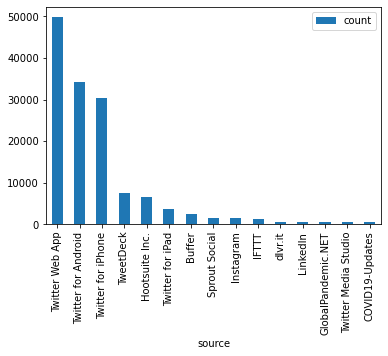

In [27]:
source_df.plot.bar(x = 'source');

# This is a sentiment analysis so we need a word cloud...

# Word cloud - positive, negative and neutral

# Top ngrams, bigrams and trigrams

# Positivity world map overlay